Let's start with a model that's very effective at learning Cats v Dogs.

It's similar to the previous models that you have used, but I have updated the layers definition. Note that there are now 4 convolutional layers with 32, 64, 128 and 128 convolutions respectively.

Also, this will train for 100 epochs, because I want to plot the graph of loss and accuracy.

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow as tf

In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-11-10 15:11:50--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.193.128, 2a00:1450:400b:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  19.2MB/s    in 3.4s    

2019-11-10 15:11:54 (19.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 12s - loss: 0.6986 - acc: 0.5200 - val_loss: 0.6777 - val_acc: 0.6030
Epoch 2/20
100/100 - 9s - loss: 0.6666 - acc: 0.5820 - val_loss: 0.6416 - val_acc: 0.6190
Epoch 3/20
100/100 - 9s - loss: 0.6306 - acc: 0.6485 - val_loss: 0.6087 - val_acc: 0.6960
Epoch 4/20
100/100 - 10s - loss: 0.5829 - acc: 0.6965 - val_loss: 0.5728 - val_acc: 0.7040
Epoch 5/20
100/100 - 10s - loss: 0.5432 - acc: 0.7305 - val_loss: 0.5741 - val_acc: 0.6960
Epoch 6/20
100/100 - 10s - loss: 0.5105 - acc: 0.7475 - val_loss: 0.5516 - val_acc: 0.7230
Epoch 7/20
100/100 - 9s - loss: 0.4881 - acc: 0.7650 - val_loss: 0.5452 - val_acc: 0.7310
Epoch 8/20
100/100 - 9s - loss: 0.4575 - acc: 0.7920 - val_loss: 0.5558 - val_acc: 0.7170
Epoch 9/20
100/100 - 9s - loss: 0.4341 - acc: 0.8010 - val_loss: 0.5264 - val_acc: 0.7460
Epoch 10/20
100/100 - 9s - loss: 0.4121 - acc: 0.8130 - val_loss: 0.5443 - val_acc: 0.7250
Epoch 11/20
100/100 - 9s - loss: 0.3813 - acc: 0.8315 - val_loss: 0.5379 - val_acc: 0.7540
Epoc

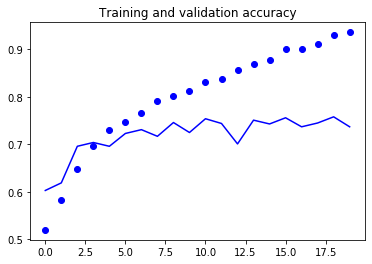

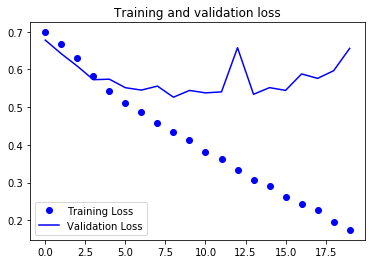

In [9]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc.  That's what image augementation is all about. And there's an API that makes it easy...

Now take a look at the ImageGenerator. There are properties on it that you can use to augment the image. 

```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.


Here's some code where we've added Image Augmentation. Run it to see the impact.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])



In [11]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 12s - loss: 0.6938 - acc: 0.5115 - val_loss: 0.6826 - val_acc: 0.5440
Epoch 2/100
100/100 - 12s - loss: 0.6834 - acc: 0.5600 - val_loss: 0.6866 - val_acc: 0.5290
Epoch 3/100
100/100 - 11s - loss: 0.6702 - acc: 0.5890 - val_loss: 0.6385 - val_acc: 0.6430
Epoch 4/100
100/100 - 11s - loss: 0.6527 - acc: 0.6200 - val_loss: 0.6310 - val_acc: 0.6400
Epoch 5/100
100/100 - 12s - loss: 0.6441 - acc: 0.6370 - val_loss: 0.6107 - val_acc: 0.6540
Epoch 6/100
100/100 - 12s - loss: 0.6241 - acc: 0.6560 - val_loss: 0.5940 - val_acc: 0.6580
Epoch 7/100
100/100 - 12s - loss: 0.6071 - acc: 0.6725 - val_loss: 0.5580 - val_acc: 0.7120
Epoch 8/100
100/100 - 13s - loss: 0.5952 - acc: 0.6850 - val_loss: 0.5487 - val_acc: 0.7120
Epoch 9/100
100/100 - 12s - loss: 0.5851 - acc: 0.6890 - val_loss: 0.5955 - val_acc: 0.6790
Epoch 10/100
100/100 - 12s - loss: 0.5866 - acc: 0.6915 - val_loss: 0.5302 - val_acc: 0.

Epoch 89/100
100/100 - 12s - loss: 0.3816 - acc: 0.8250 - val_loss: 0.4374 - val_acc: 0.7960
Epoch 90/100
100/100 - 12s - loss: 0.3648 - acc: 0.8325 - val_loss: 0.4842 - val_acc: 0.7660
Epoch 91/100
100/100 - 12s - loss: 0.3683 - acc: 0.8300 - val_loss: 0.4101 - val_acc: 0.8120
Epoch 92/100
100/100 - 12s - loss: 0.3728 - acc: 0.8295 - val_loss: 0.3945 - val_acc: 0.8070
Epoch 93/100
100/100 - 13s - loss: 0.3699 - acc: 0.8270 - val_loss: 0.4163 - val_acc: 0.8090
Epoch 94/100
100/100 - 12s - loss: 0.3611 - acc: 0.8390 - val_loss: 0.4250 - val_acc: 0.8000
Epoch 95/100
100/100 - 12s - loss: 0.3697 - acc: 0.8355 - val_loss: 0.4010 - val_acc: 0.8190
Epoch 96/100
100/100 - 12s - loss: 0.3706 - acc: 0.8320 - val_loss: 0.3935 - val_acc: 0.8140
Epoch 97/100
100/100 - 12s - loss: 0.3667 - acc: 0.8425 - val_loss: 0.4123 - val_acc: 0.8080
Epoch 98/100
100/100 - 12s - loss: 0.3672 - acc: 0.8415 - val_loss: 0.4014 - val_acc: 0.8060
Epoch 99/100
100/100 - 12s - loss: 0.3463 - acc: 0.8490 - val_loss: 0.

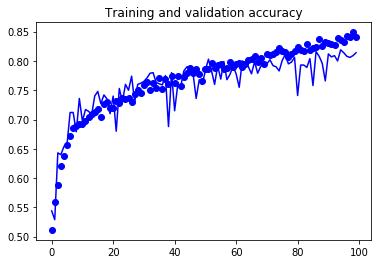

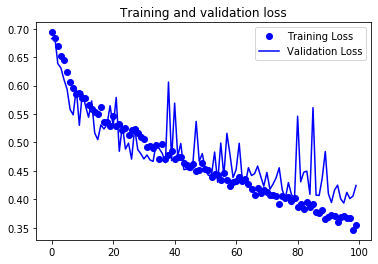

In [15]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])



In [24]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 14s - loss: 0.6924 - acc: 0.5155 - val_loss: 0.6873 - val_acc: 0.5830
Epoch 2/20
100/100 - 12s - loss: 0.6831 - acc: 0.5625 - val_loss: 0.6676 - val_acc: 0.5590
Epoch 3/20
100/100 - 12s - loss: 0.6719 - acc: 0.5935 - val_loss: 0.6499 - val_acc: 0.6130
Epoch 4/20
100/100 - 13s - loss: 0.6514 - acc: 0.6220 - val_loss: 0.6306 - val_acc: 0.6300
Epoch 5/20
100/100 - 13s - loss: 0.6438 - acc: 0.6345 - val_loss: 0.6116 - val_acc: 0.6700
Epoch 6/20
100/100 - 13s - loss: 0.6314 - acc: 0.6500 - val_loss: 0.6873 - val_acc: 0.5870
Epoch 7/20
100/100 - 12s - loss: 0.6280 - acc: 0.6470 - val_loss: 0.6017 - val_acc: 0.6620
Epoch 8/20
100/100 - 12s - loss: 0.6283 - acc: 0.6485 - val_loss: 0.5772 - val_acc: 0.6910
Epoch 9/20
100/100 - 13s - loss: 0.6075 - acc: 0.6670 - val_loss: 0.5637 - val_acc: 0.6870
Epoch 10/20
100/100 - 13s - loss: 0.6043 - acc: 0.6770 - val_loss: 0.5614 - val_acc: 0.6980
Epoch 11/20
100/100 - 13s - loss: 0.5933 - acc: 0.6655 - val_loss: 0.5475 - val_acc: 0.71

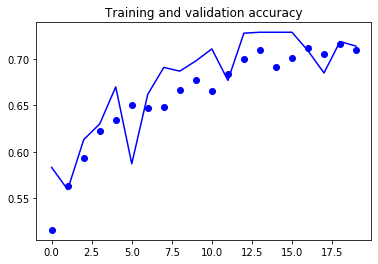

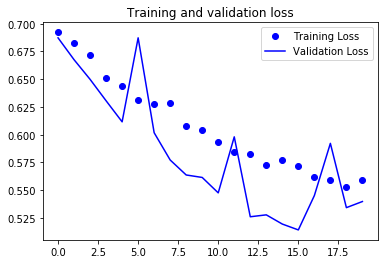

In [26]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()